In [1]:
import pandas as pd
import numpy as np

import sys
import os

from pathlib import Path
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, normalize
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

## Step 1

In [4]:
complete_info_df = pd.read_csv('../data/complete_info_t.csv')
complete_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   file           1115 non-null   object
 1   speaker        1115 non-null   object
 2   film           1115 non-null   object
 3   emotion        1115 non-null   object
 4   language       1115 non-null   object
 5   transcritpion  1115 non-null   object
 6   timestamp      347 non-null    object
dtypes: object(7)
memory usage: 61.1+ KB


In [11]:
emofilm_df = pd.read_csv('d:/Documents/emofilm_df.csv')
emofilm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  1115 non-null   object
 1   path     1115 non-null   object
dtypes: object(2)
memory usage: 17.5+ KB


In [6]:
# data_en_df = complete_info_df.loc[complete_info_df['language'] == 'en']
# data_es_df = complete_info_df.loc[complete_info_df['language'] == 'es']
# data_it_df = complete_info_df.loc[complete_info_df['language'] == 'it']

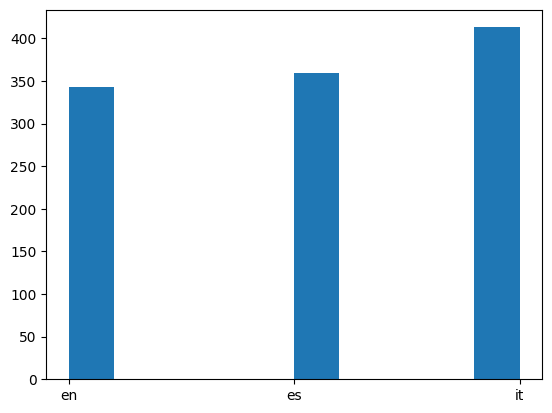

In [9]:
plt.hist(complete_info_df['language'])
plt.show()

In [26]:
def extract_zcr_sc(path):
    a, sr = librosa.load(path=path)
    return [
        librosa.feature.zero_crossing_rate(a)[0, 0],
        librosa.feature.spectral_centroid(y=a, sr=sr)[0, 0],
    ]

In [13]:
emofilm_df.emotion.unique()

array(['fear', 'contempt', 'happiness', 'anger', 'sadness'], dtype=object)

In [24]:
emofilm_fear = emofilm_df.loc[emofilm_df['emotion'] == 'fear']
emofilm_contempt = emofilm_df.loc[emofilm_df['emotion'] == 'contempt']
emofilm_happiness = emofilm_df.loc[emofilm_df['emotion'] == 'happiness']
emofilm_anger = emofilm_df.loc[emofilm_df['emotion'] == 'anger']
emofilm_sadness = emofilm_df.loc[emofilm_df['emotion'] == 'sadness']

In [30]:
fear_features = np.array([extract_zcr_sc(x) for x in emofilm_fear['path']])
contempt_features = np.array([extract_zcr_sc(x)
                             for x in emofilm_contempt['path']])
happiness_features = np.array([extract_zcr_sc(x)
                              for x in emofilm_happiness['path']])
anger_features = np.array([extract_zcr_sc(x) for x in emofilm_anger['path']])
sadness_features = np.array([extract_zcr_sc(x)
                            for x in emofilm_sadness['path']])

Text(0, 0.5, 'Count')

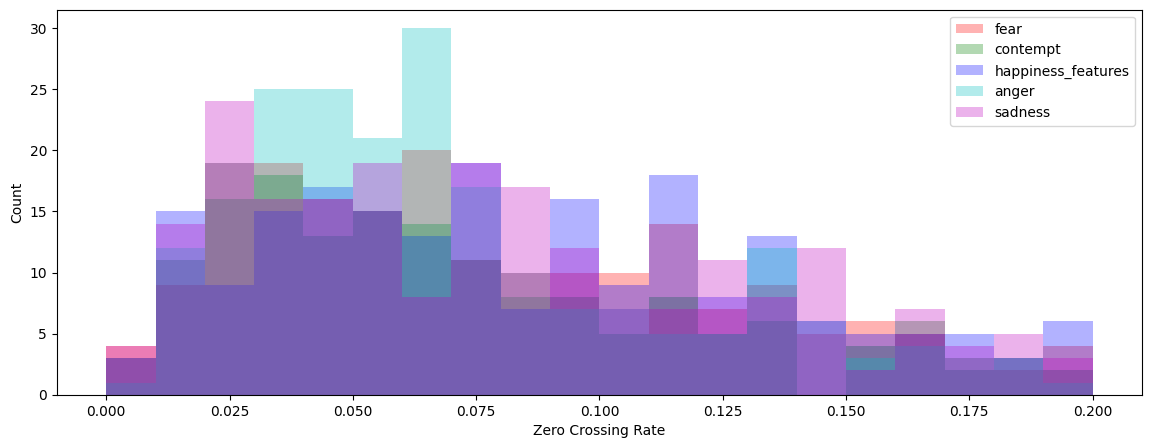

In [35]:
plt.figure(figsize=(14, 5))
plt.hist(fear_features[:, 0], color='r', range=(0, 0.2), alpha=0.3, bins=20)
plt.hist(contempt_features[:, 0], color='g',
         range=(0, 0.2), alpha=0.3, bins=20)
plt.hist(happiness_features[:, 0], color='b',
         range=(0, 0.2), alpha=0.3, bins=20)
plt.hist(anger_features[:, 0], color='c', range=(0, 0.2), alpha=0.3, bins=20)
plt.hist(sadness_features[:, 0], color='m', range=(0, 0.2), alpha=0.3, bins=20)
plt.legend(('fear', 'contempt', 'happiness_features', 'anger', 'sadness'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

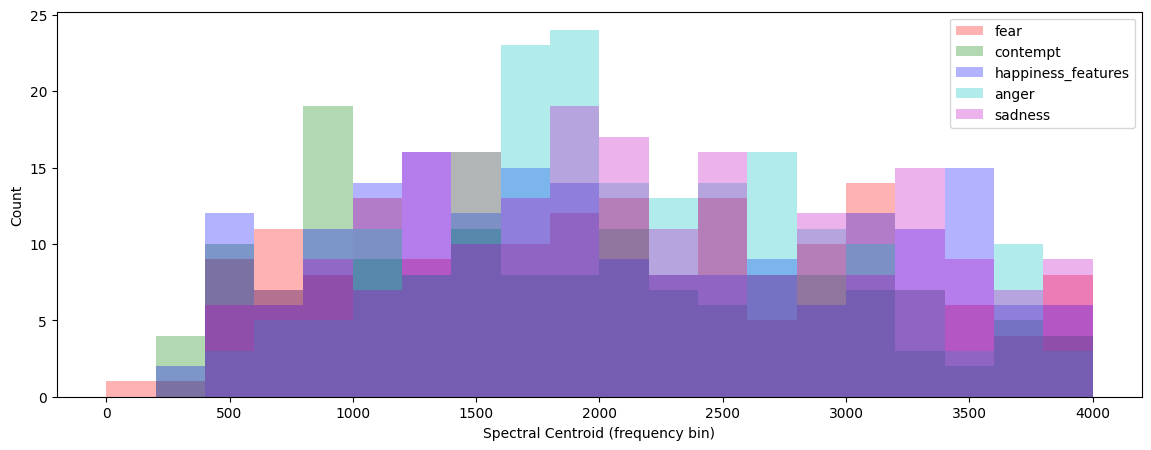

In [37]:
plt.figure(figsize=(14, 5))
plt.hist(fear_features[:, 1], color='r', range=(0, 4000), alpha=0.3, bins=20)
plt.hist(contempt_features[:, 1], color='g',
         range=(0, 4000), alpha=0.3, bins=20)
plt.hist(happiness_features[:, 1], color='b',
         range=(0, 4000), alpha=0.3, bins=20)
plt.hist(anger_features[:, 1], color='c', range=(0, 4000), alpha=0.3, bins=20)
plt.hist(sadness_features[:, 1], color='m',
         range=(0, 4000), alpha=0.3, bins=20)
plt.legend(('fear', 'contempt', 'happiness_features', 'anger', 'sadness'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

In [39]:
scaler = MinMaxScaler()
feature_table = np.vstack((fear_features, contempt_features,
                          anger_features, sadness_features, happiness_features))

scaler.fit(feature_table)

MinMaxScaler()

In [40]:
fear_features_scaled = scaler.transform(fear_features)
contempt_features_scaled = scaler.transform(contempt_features)
happiness_features_scaled = scaler.transform(happiness_features)
anger_features_scaled = scaler.transform(anger_features)
sadness_features_scaled = scaler.transform(sadness_features)

Text(0, 0.5, 'Spectral Centroid')

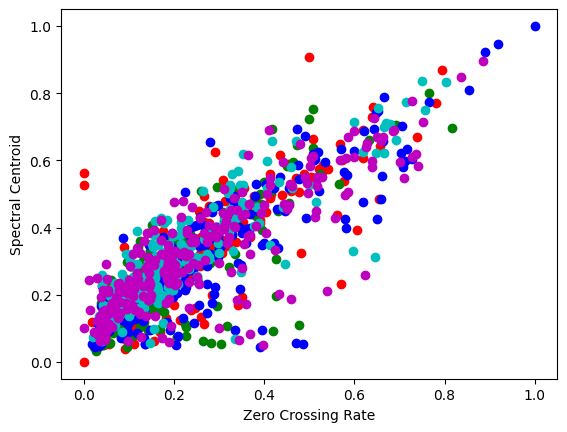

In [41]:
plt.scatter(fear_features_scaled[:, 0], fear_features_scaled[:, 1], c='r')
plt.scatter(contempt_features_scaled[:, 0],
            contempt_features_scaled[:, 1], c='g')
plt.scatter(happiness_features_scaled[:, 0],
            happiness_features_scaled[:, 1], c='b')
plt.scatter(anger_features_scaled[:, 0], anger_features_scaled[:, 1], c='c')
plt.scatter(sadness_features_scaled[:, 0],
            sadness_features_scaled[:, 1], c='m')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

## Step 2

In [53]:
import features_1d as ft

In [8]:
emofilm_uk_df = pd.read_csv('D:/Documents/emofilm/data/emofilm_uk_df.csv')
emofilm_df = pd.read_csv('D:/Documents/emofilm_df.csv')
ravdess_df = pd.read_csv('D:/Documents/ravdess_df.csv')
savee_df = pd.read_csv('D:/Documents/savee_df.csv')
tess_df = pd.read_csv('D:/Documents/tess_df.csv')
cremad_df = pd.read_csv('D:/Documents/cremad_df.csv')

In [9]:
data_df = pd.concat([emofilm_df, emofilm_uk_df],
                    axis=0, ignore_index=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141 entries, 0 to 1140
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  1141 non-null   object
 1   path     1141 non-null   object
dtypes: object(2)
memory usage: 18.0+ KB


In [15]:
f_map = {'data': [], 'emotion': []}
fixed_length = 3 * 22050
for i, row in data_df.iterrows():
    a, sr = librosa.load(row['path'])
    a = librosa.util.fix_length(a, size=fixed_length)
    data = ft.extraxt_avg_mfccs(a, sr)
    f_map['data'].append(data)
    f_map['emotion'].append(row['emotion'])

features_df = pd.DataFrame(f_map)

features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141 entries, 0 to 1140
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   data     1141 non-null   object
 1   emotion  1141 non-null   object
dtypes: object(2)
memory usage: 18.0+ KB


In [11]:

feature_table = np.zeros(20)
print(feature_table.shape)
for i in features_df.data:
    feature_table = np.vstack((feature_table, i))

feature_table = np.delete(feature_table, 0, axis=0)
feature_table.shape
scaler = MinMaxScaler()
feature_table = scaler.fit_transform(feature_table)

(20,)


In [ ]:
# mfcc = np.mean(librosa.feature.mfcc(y=a, sr=sr).T, axis=0)
# mfcc2 = np.mean(librosa.feature.mfcc(y=a, sr=sr), axis=1)
# print(np.allclose(mfcc, mfcc2))

(20, 130)


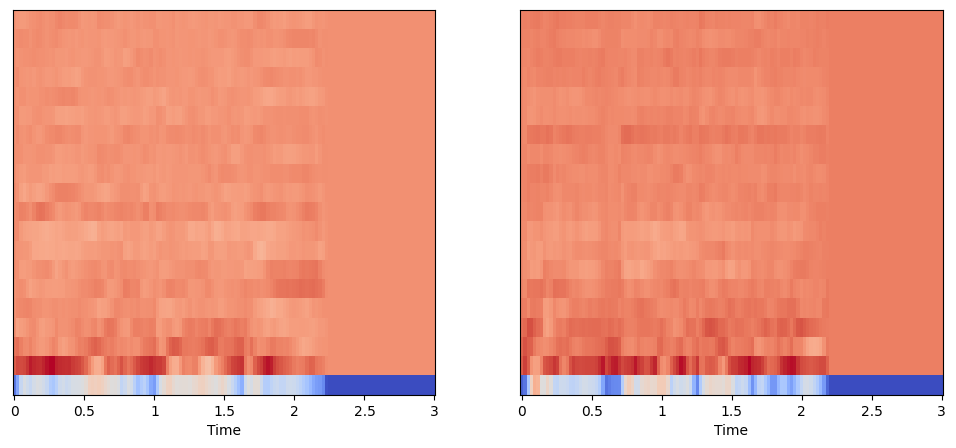

In [45]:
from matplotlib import figure


a, sr = librosa.load(data_df.path[1])
a = librosa.util.fix_length(a, size=fixed_length)
b, sr = librosa.load(data_df.path[4])
b = librosa.util.fix_length(b, size=fixed_length)
mfcc1 = librosa.feature.mfcc(y=a, sr=sr)
mfcc2 = librosa.feature.mfcc(y=b, sr=sr)
print(mfcc2.shape)
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
# fig.set_size_inches((10, 5))
librosa.display.specshow(mfcc1, sr=sr, x_axis='time', ax=axs[0])

librosa.display.specshow(mfcc2, sr=sr, x_axis='time', ax=axs[1])
plt.show()

In [58]:
def get_raw_mfcc(path, fixed_length=-1):
    data, sr = librosa.load(path)
    if (fixed_length > 0):
        data = librosa.util.fix_length(data, size=fixed_length)
    # without augmentation
    mfcc = librosa.feature.mfcc(y=data, sr=sr)
    return mfcc

In [69]:
mfccs_df = pd.DataFrame(columns=['data', 'emotion'])

for emotion, group_data in data_df.groupby("emotion"):
    # Perform any processing on the group_data DataFrame
    # print(group_data)
    res = np.zeros(mfcc1.shape)
    for i, row in group_data.iterrows():
        mfcc = get_raw_mfcc(row['path'], fixed_length)
        res = np.add(res, mfcc)

    new_row = {'data': res, 'emotion': emotion}
    mfccs_df.loc[len(mfccs_df)] = new_row

print(mfccs_df)

                                                data    emotion
0  [[-87037.51244354248, -62652.12274169922, -504...      anger
1  [[-80133.89892578125, -61138.97225189209, -500...   contempt
2  [[-98738.24174499512, -77895.35828399658, -649...       fear
3  [[-106506.50646972656, -79926.43146324158, -62...  happiness
4  [[-120183.34197998047, -98641.33866119385, -84...    sadness


In [98]:
scaler = MinMaxScaler()
tmp = mfccs_df.data.to_numpy()
res = np.empty((20, 130))
# mfccs_df_scaled = scaler.fit_transform()
for i in tmp:
    res = np.vstack((res, i))


print(res.shape)
scaler.fit(res)

(120, 130)


MinMaxScaler()

In [63]:
mfccs_df.data[0]

array([[-8.70375124e+04, -6.26521227e+04, -5.04129289e+04, ...,
        -1.23604817e+05, -1.24161773e+05, -1.25423010e+05],
       [ 1.43625791e+04,  1.55104754e+04,  1.60177874e+04, ...,
         4.18654971e+03,  4.22019170e+03,  4.32522558e+03],
       [-3.99873513e+03, -7.10723167e+03, -9.75766902e+03, ...,
        -2.63227348e+03, -2.24520801e+03, -1.65535150e+03],
       ...,
       [ 1.00756313e+02, -2.91902277e+01, -6.40837256e+01, ...,
        -1.39695532e+02, -1.01471384e+02, -8.06318558e+01],
       [-1.92536662e+02, -4.41755684e+02, -4.10726133e+02, ...,
        -2.70788022e+02, -2.47542901e+02, -1.54538567e+02],
       [-6.81533805e+01,  9.07321361e+00,  8.14832940e+01, ...,
        -1.72953337e+02, -1.23607816e+02, -9.10704301e+01]])

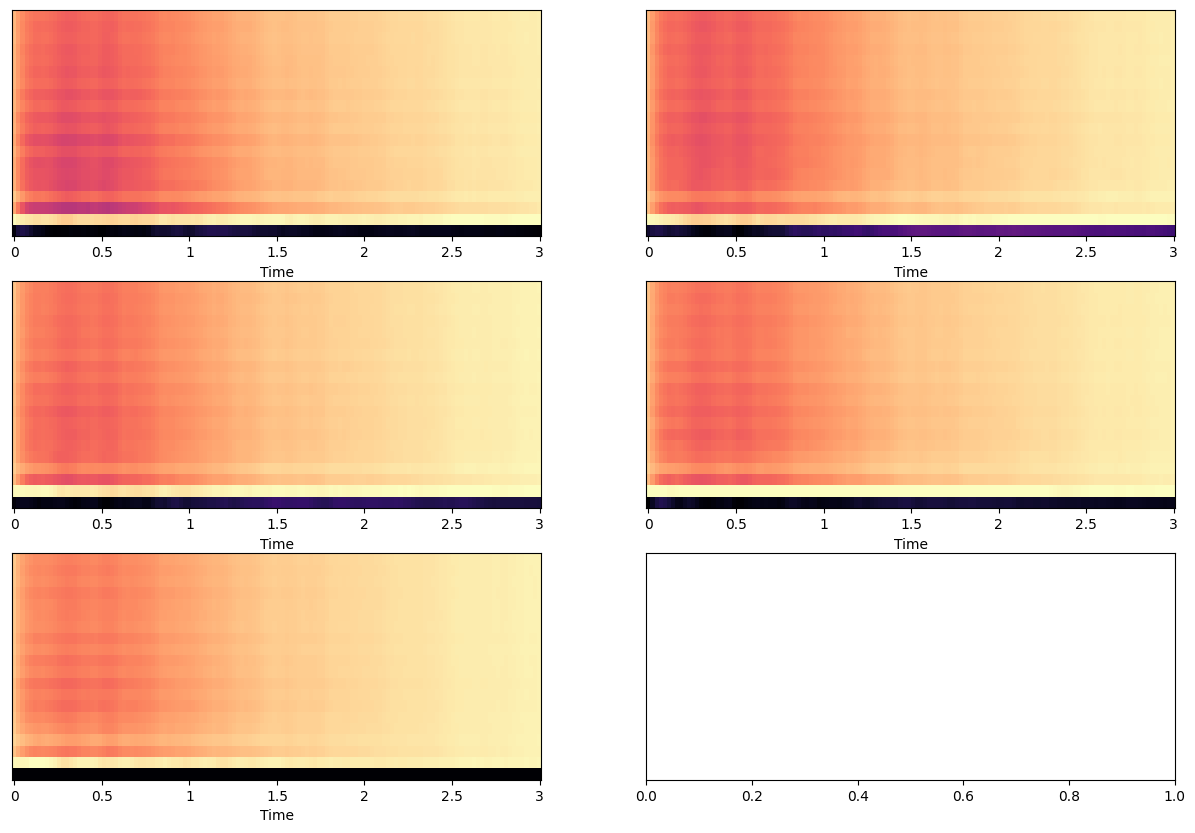

In [101]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10), sharey=True)
# fig.set_size_inches((10, 5))
librosa.display.specshow(scaler.transform(
    mfccs_df.data[0]), sr=sr, x_axis='time', ax=axs[0][0])
librosa.display.specshow(scaler.transform(
    mfccs_df.data[1]), sr=sr, x_axis='time', ax=axs[0][1])
librosa.display.specshow(scaler.transform(
    mfccs_df.data[2]), sr=sr, x_axis='time', ax=axs[1][0])
librosa.display.specshow(scaler.transform(
    mfccs_df.data[3]), sr=sr, x_axis='time', ax=axs[1][1])
librosa.display.specshow(scaler.transform(
    mfccs_df.data[4]), sr=sr, x_axis='time', ax=axs[2][0])
plt.show()

In [28]:
import seaborn as sns

In [62]:
sns.heatmap(mfccs_df[0])

KeyError: 0

In [13]:
# with np.printoptions(threshold=np.inf):
#     print(a)

In [37]:
feature_table

array([[0.57976649, 0.46074342, 0.70856827, ..., 0.50264814, 0.4402313 ,
        0.47139842],
       [0.70758585, 0.36709857, 0.78174477, ..., 0.34473899, 0.57879304,
        0.5237386 ],
       [0.69353733, 0.45651825, 0.70159256, ..., 0.61753635, 0.18128655,
        0.48372861],
       ...,
       [0.71894946, 0.38754841, 0.66724306, ..., 0.56193946, 0.51042803,
        0.62528387],
       [0.1206096 , 0.4248439 , 0.5448672 , ..., 0.49309131, 0.58691026,
        0.49838959],
       [0.81103645, 0.46120624, 0.66331602, ..., 0.56983479, 0.45487267,
        0.6203428 ]])

In [39]:
feature_table.shape

(1141, 20)

Text(0, 0.5, 'Count')

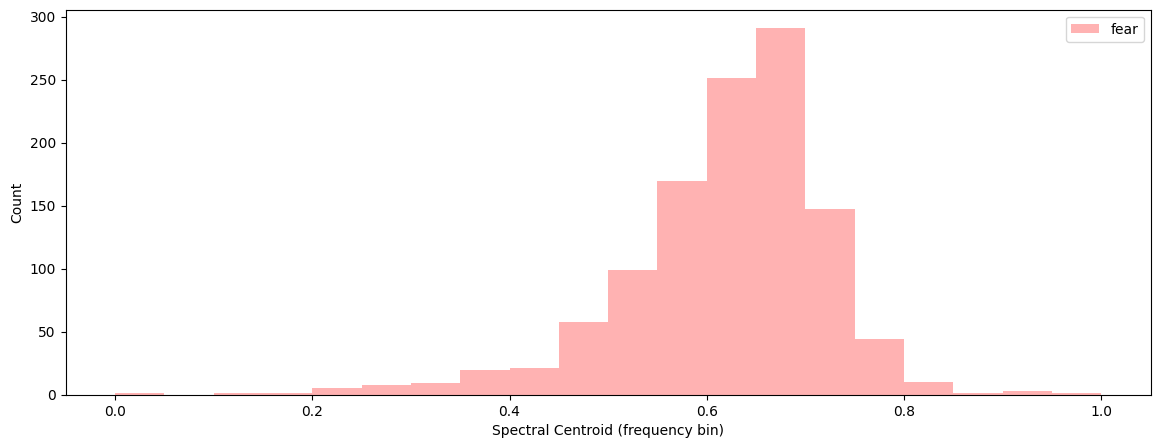

In [42]:
plt.figure(figsize=(14, 5))
plt.hist(feature_table[:, 2], color='r', alpha=0.3, bins=20)
# plt.hist(contempt_features[:, 1], color='g',
#          range=(0, 4000), alpha=0.3, bins=20)
# plt.hist(happiness_features[:, 1], color='b',
#          range=(0, 4000), alpha=0.3, bins=20)
# plt.hist(anger_features[:, 1], color='c', range=(0, 4000), alpha=0.3, bins=20)
# plt.hist(sadness_features[:, 1], color='m',
#          range=(0, 4000), alpha=0.3, bins=20)
plt.legend(('fear', 'contempt', 'happiness_features', 'anger', 'sadness'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

ValueError: setting an array element with a sequence.

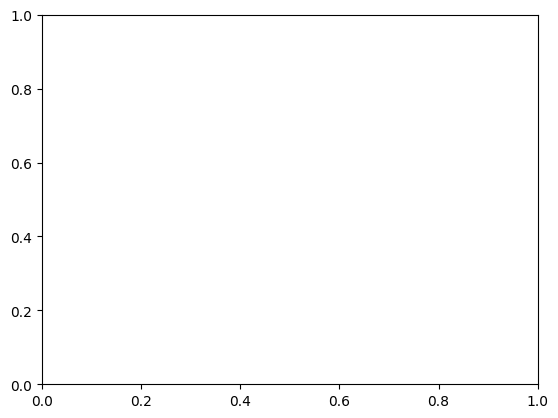

In [11]:
plt.scatter(features_df.data, features_df.data, c='r')
# plt.scatter(contempt_features_scaled[:, 0],
#             contempt_features_scaled[:, 1], c='g')
# plt.scatter(happiness_features_scaled[:, 0],
#             happiness_features_scaled[:, 1], c='b')
# plt.scatter(anger_features_scaled[:, 0], anger_features_scaled[:, 1], c='c')
# plt.scatter(sadness_features_scaled[:, 0],
#             sadness_features_scaled[:, 1], c='m')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')